In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib

In [2]:
df1 = pd.read_csv("BHData.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df1["area_type"].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [6]:
df1=df1.drop(columns=["availability","balcony","area_type","society"])

In [7]:
df1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [8]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df2=df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df2["size"].value_counts()

size
2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [11]:
df2["bhk"] = df2["size"].apply(lambda x: int(x.split(" ")[0]))
df2

/var/folders/k0/5bm0dfz51t1g5_1stq98zglw0000gn/T/ipykernel_13432/3285892691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["bhk"] = df2["size"].apply(lambda x: int(x.split(" ")[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [12]:
df2=df2.drop(columns=["size"])

In [13]:
df2["location"].value_counts()

location
Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: count, Length: 1304, dtype: int64

In [14]:
df2[df2["bhk"]>10]

,location,total_sqft,bath,price,bhk
459,1 Giri Nagar,5000,9.0,360.0,11
1718,2Electronic City Phase II,8000,27.0,230.0,27
1768,1 Ramamurthy Nagar,1200,11.0,170.0,11
3379,1Hanuman Nagar,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,10000,16.0,550.0,16
3853,1 Annasandrapalya,1200,6.0,150.0,11
4684,Munnekollal,2400,40.0,660.0,43
4916,1Channasandra,1250,15.0,125.0,14
6533,Mysore Road,2232,6.0,300.0,12
7979,1 Immadihalli,6000,12.0,150.0,11


In [15]:
df2["total_sqft"].describe()

count     13246
unique     2067
top        1200
freq        843
Name: total_sqft, dtype: object

In [16]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

df2[~df2["total_sqft"].apply(is_float)]["total_sqft"]

30       2100 - 2850
122      3067 - 8156
137      1042 - 1105
165      1145 - 1340
188      1015 - 1540
            ...     
12975     850 - 1060
12990    1804 - 2273
13059    1200 - 1470
13265    1133 - 1384
13299    2830 - 2882
Name: total_sqft, Length: 190, dtype: object

In [17]:
def convert_to_sqft(x):
    tokens=x.split("-")
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None


convert_to_sqft("34.46Sq. Meter")

In [18]:
df3 = df2.copy()
df3["total_sqft"] = df3["total_sqft"].apply(convert_to_sqft)

In [19]:
df3.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [20]:
(2100 + 2850) /2


2475.0

In [21]:
df4 =df3.copy()
df4["price/sqft"]=(df4["price"]*100000)/df4["total_sqft"]
df4

,location,total_sqft,bath,price,bhk,price/sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [22]:
locations = df4["location"].value_counts().sort_values()
locations

location
Abshot Layout               1
Yelahanka,MVIT college      1
Pillahalli                  1
Rajarajesheari nagar        1
Asthagrama Layout           1
                         ... 
Thanisandra               233
Kanakpura Road            266
Electronic City           302
Sarjapur  Road            392
Whitefield                534
Name: count, Length: 1304, dtype: int64

In [23]:
location_less_than_10 = locations[locations<=10]
location_less_than_10

location
Abshot Layout              1
Yelahanka,MVIT college     1
Pillahalli                 1
Rajarajesheari nagar       1
Asthagrama Layout          1
                          ..
Ganga Nagar               10
BTM 1st Stage             10
1st Block Koramangala     10
Basapura                  10
Nagappa Reddy Layout      10
Name: count, Length: 1063, dtype: int64

In [24]:
df5=df4.copy()
df5["location"]=df5["location"].apply(lambda x: "other" if x in location_less_than_10 else x)
df5["location"].value_counts()

location
other                 2896
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
                      ... 
Marsur                  11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: count, Length: 242, dtype: int64

In [25]:
df5

,location,total_sqft,bath,price,bhk,price/sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,other,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [26]:
df5[df5['total_sqft']/df5['bhk']<300]

,location,total_sqft,bath,price,bhk,price/sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,other,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...
13277,other,1400.0,7.0,218.0,7,15571.428571
13279,other,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,774.0,5.0,70.0,5,9043.927649


In [27]:
df6 =df5[~(df5['total_sqft']/df5['bhk']<300)]
df6

,location,total_sqft,bath,price,bhk,price/sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,other,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [28]:
df6.describe()

,total_sqft,bath,price,bhk,price/sqft
count,12456.000000,12502.000000,12502.000000,12502.000000,12456.000000
mean,1590.189927,2.564790,111.311915,2.650696,6308.502826
std,1260.404795,1.084946,152.089966,0.981698,4168.127339
min,300.000000,1.000000,9.000000,1.000000,267.829813
25%,1115.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [29]:
def remove_outliners(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby("location"):
        m = np.mean(subdf["price/sqft"])
        sd = np.std(subdf["price/sqft"])
        reduced_df=subdf[(subdf['price/sqft']>(m-sd)) & (subdf['price/sqft']<=(m+sd))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out


df7=remove_outliners(df6)
df7["location"].value_counts()

location
other                   2314
Whitefield               478
Sarjapur  Road           296
Electronic City          277
Kanakpura Road           190
                        ... 
Thyagaraja Nagar           4
HAL 2nd Stage              4
Vishveshwarya Layout       4
Banjara Layout             4
Marsur                     3
Name: count, Length: 242, dtype: int64

,location,total_sqft,bath,price,bhk,price/sqft
0,Devarachikkanahalli,1250.0,2.0,44.0,3,3520.000000
1,Devarachikkanahalli,1250.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,1200.0,2.0,83.0,2,6916.666667


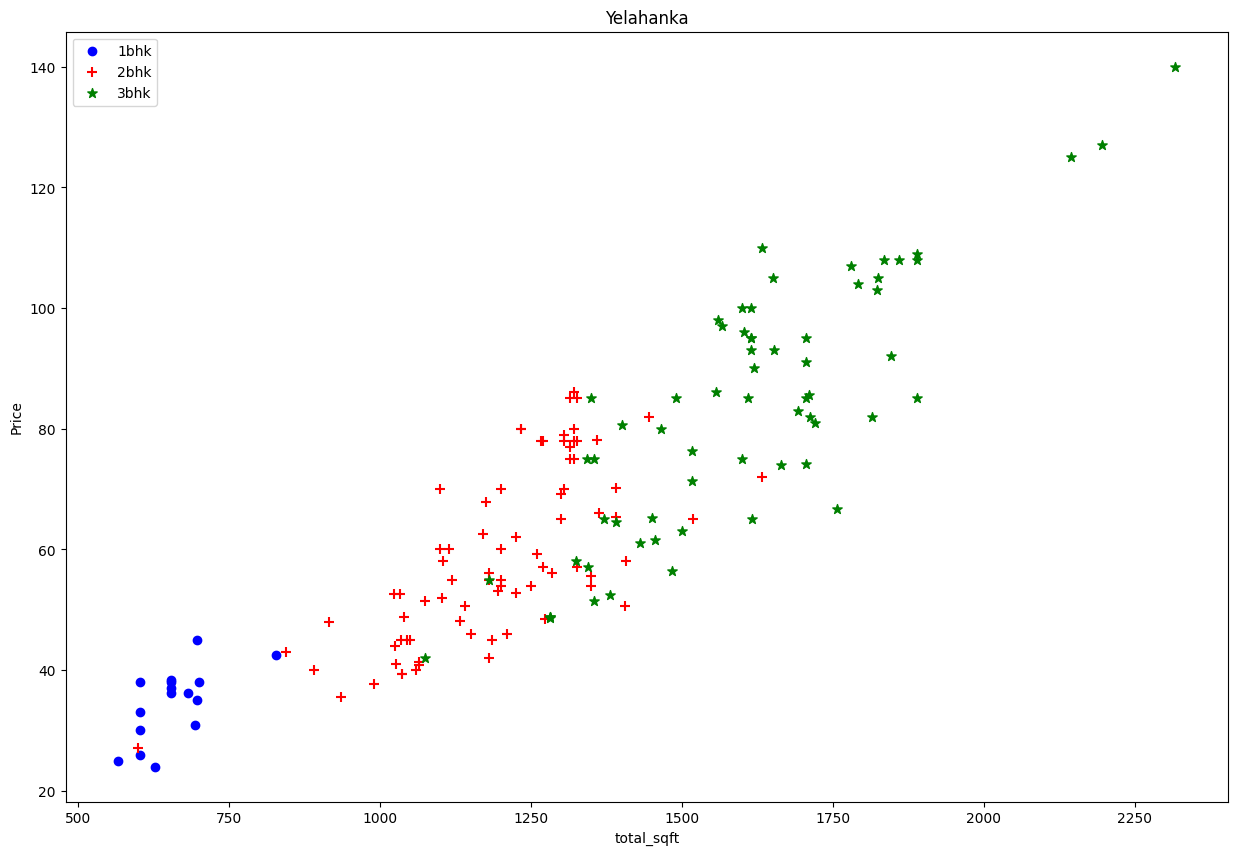

In [36]:
def plot_scatter_chart(df,loc):
    # print(df)
    bhk1=df[(df["bhk"]==1) & (df['location']==loc)]
    bhk2=df[(df["bhk"]==2) & (df['location']==loc)]
    bhk3=df[(df["bhk"]==3) & (df['location']==loc)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk1['total_sqft'],bhk1['price'],color='blue',label="1bhk")
    plt.scatter(bhk2['total_sqft'],bhk2['price'],color='red',label="2bhk",s=50,marker="+")
    plt.scatter(bhk3['total_sqft'],bhk3['price'],color='green',label="3bhk",s=50,marker="*")
    plt.xlabel("total_sqft")
    plt.ylabel("Price")
    plt.title(loc)
    plt.legend()

plot_scatter_chart(df=df7,loc="Yelahanka")
df7.head(3)


In [38]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for loc,loc_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in loc_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df['price/sqft']),
                'std':np.std(bhk_df['price/sqft']),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in loc_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df['price/sqft']<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
df8

,location,total_sqft,bath,price,bhk,price/sqft
1,Devarachikkanahalli,1250.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,1200.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,1170.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,1425.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,947.0,2.0,43.0,2,4540.654699
...,...,...,...,...,...,...
10235,other,1200.0,2.0,70.0,2,5833.333333
10236,other,1800.0,1.0,200.0,1,11111.111111
10239,other,1353.0,2.0,110.0,2,8130.081301
10240,other,812.0,1.0,26.0,1,3201.970443


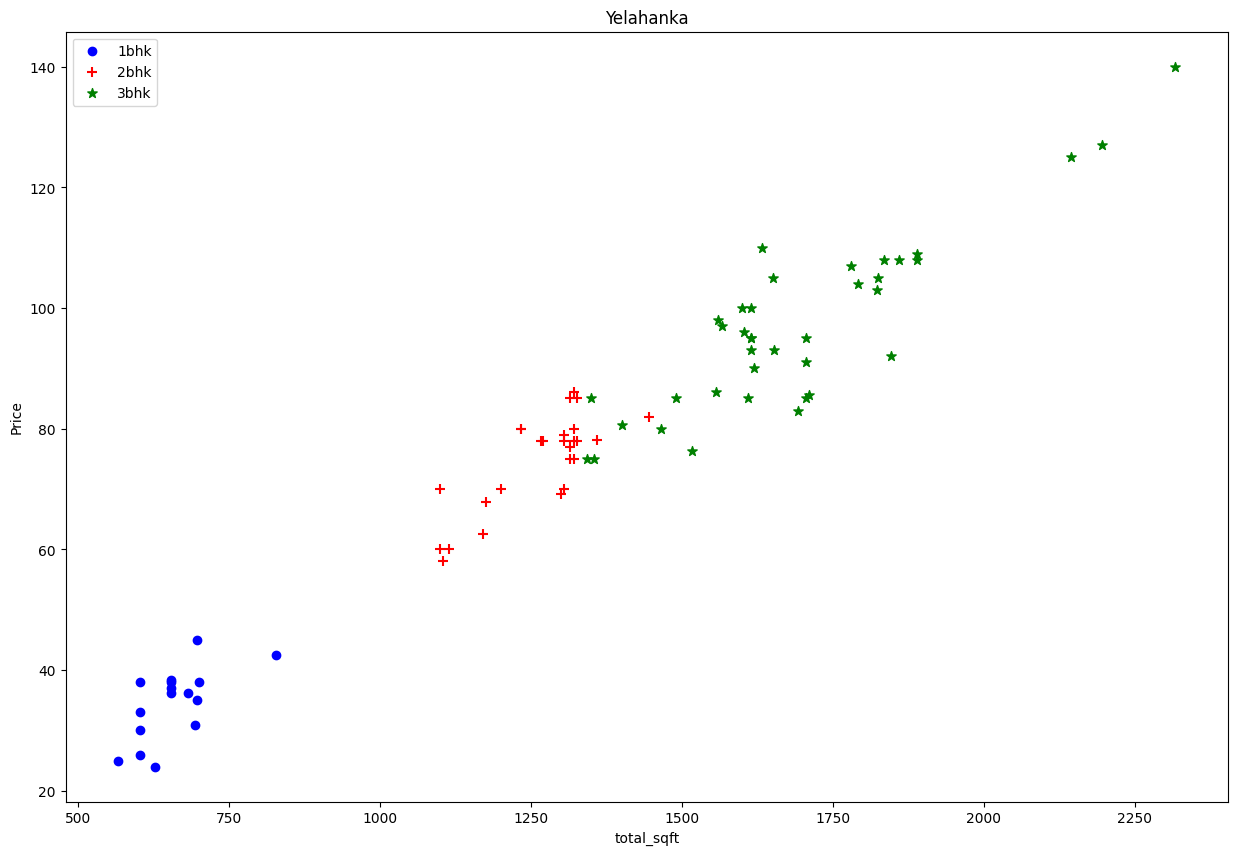

In [39]:
plot_scatter_chart(df=df8,loc="Yelahanka")


Text(0.5, 0, 'price/sqft')

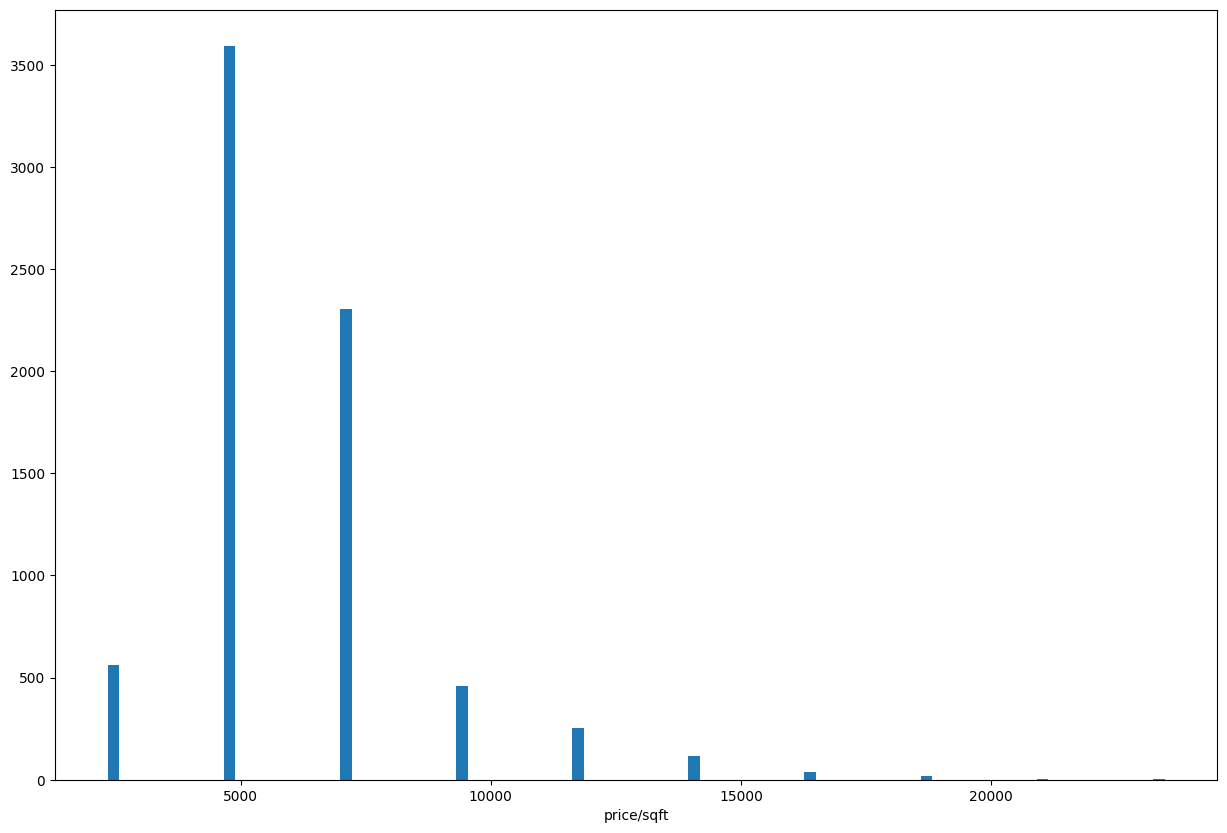

In [43]:
plt.hist(df8['price/sqft'],rwidth=0.1)
plt.xlabel('price/sqft')
# plt.ylabel('count')

In [44]:
df9 = df8[df8['bath']<df8['bhk']+2]
df9

,location,total_sqft,bath,price,bhk,price/sqft
1,Devarachikkanahalli,1250.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,1200.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,1170.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,1425.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,947.0,2.0,43.0,2,4540.654699
...,...,...,...,...,...,...
10235,other,1200.0,2.0,70.0,2,5833.333333
10236,other,1800.0,1.0,200.0,1,11111.111111
10239,other,1353.0,2.0,110.0,2,8130.081301
10240,other,812.0,1.0,26.0,1,3201.970443


In [46]:
df10 =df9.drop(['price/sqft'],axis='columns')

In [52]:
dummies=pd.get_dummies(df10['location'])

In [54]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Devarachikkanahalli,1200.0,2.0,83.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Devarachikkanahalli,1170.0,2.0,40.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Devarachikkanahalli,1425.0,2.0,65.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,Devarachikkanahalli,947.0,2.0,43.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,other,1200.0,2.0,70.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10236,other,1800.0,1.0,200.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10239,other,1353.0,2.0,110.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10240,other,812.0,1.0,26.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [58]:
df12=df11.drop(columns=['location'])
df12

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1200.0,2.0,83.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1170.0,2.0,40.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1425.0,2.0,65.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,947.0,2.0,43.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,1200.0,2.0,70.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10236,1800.0,1.0,200.0,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10239,1353.0,2.0,110.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10240,812.0,1.0,26.0,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [59]:
X= df12.drop(columns=['price'])
y=df12['price']

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [68]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7696224927820372

In [69]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.82622151, 0.81408431, 0.87757267, 0.84822717, 0.86091226,
       0.86408669, 0.84046509, 0.87337804, 0.87527211, 0.80566077])

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso

def find_best_model_using_GridSearchCV(X,y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'fit_intercept':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']

            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        },
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
find_best_model_using_GridSearchCV(X,y)

/Users/namanrajani/Desktop/dataAnalysis/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/namanrajani/Desktop/dataAnalysis/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/namanrajani/Desktop/dataAnalysis/.venv/lib/python3.11/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/Users/namanrajani/Desktop/dataAnalysis/.venv/lib/python3.11/site-packages/sklearn/tree/_clas

,model,best_score,best_params
0,linear_regression,0.845847,{'fit_intercept': False}
1,lasso,0.709582,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.637707,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [79]:
df11['location'].value_counts()

location
other                    1144
Whitefield                237
Sarjapur  Road            186
Electronic City           161
Raja Rajeshwari Nagar     140
                         ... 
Banjara Layout              4
Nagasandra                  4
2nd Stage Nagarbhavi        4
Thyagaraja Nagar            4
Marsur                      3
Name: count, Length: 242, dtype: int64

In [81]:
X.columns

Index(['total_sqft', 'bath', 'bhk', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [91]:
def predict_price(loc,sqft,bath,bhk):
    loc_index=np.where(X.columns==loc)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index >= 0:
        x[loc_index]=1
    return lr_clf.predict([x])[0]

predict_price("Indira Nagar",1000,2,3)

/Users/namanrajani/Desktop/dataAnalysis/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


184.84961837068425

In [93]:
import pickle
with open('models/BHPModel.pickle','wb')as f:
    pickle.dump(lr_clf,f)

In [96]:
import json
columns={
    'data_columns':[col.lower() for col in X.columns]

}
with open('models/BHPColumns.json','w') as f:
    f.write(json.dumps(columns))